# ALY6140 Final Project: Predict Boston Airbnb Price

Team member: Bo Li, Minyi Chen

# Introduction
Airbnb is popular among both hosts and guests. Hosts want to share their properties for more competitive price or competitive envriomment than hotels in the area. Guests also want to live in a more affordable and friendly way while they are traveling. It is important for us to know what factors can affect the price setting and how we can predict the price based on the selected features of the properties. 

Our project idea is from Boston Airbnb Open Data on Kaggle.com published two year ago. We also go to Inside Airbnb to get the updated original data. In this project, we first explore the original datasets provided online. Next, we explore the dataset with our selected features. Then, we clean the data and explore the data again to see the differennce. At the end, we build the price prediction models and see which model is best fit for the predictions.

References: 
1. Boston Airbnb Open Data. https://www.kaggle.com/airbnb/boston/kernels 
2. Airbnb Pricing Predictions. https://airbnb-pricing-prediction.herokuapp.com

# Project Goal

To build a regression model that can predict Boston Airbnb price

# Data Source
The data we used is from Inside Airbnb:http://insideairbnb.com/get-the-data.html. We pick the Boston area because we are interested in knowing the Boston market. The data is newly updated to 2/9/2019. There are three dataset: review, calendar, and listing. We will focus on selected features in the listing dataset. 

The listing dataset includes more than 100 different features of each listing. Those features includes name, summary, space, description, bedroom, bathrooms, etc. We will only focus on selected features.

# Original Datasets Overview
1. Read three original csv datasets: review, calendar, listing
2. Go over first 5 rows of each dataset
3. Check unique value of columns
4. Decide to focus on only one dataset: listing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets
%matplotlib inline

In [2]:
# first dataset
df1 = pd.read_csv('calendar.csv')
df1.head() #prints the first 5 rows

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,225224,2019-02-09,t,$105.00,$105.00,1,365
1,225224,2019-02-10,t,$105.00,$105.00,1,365
2,225224,2019-02-11,t,$105.00,$105.00,1,365
3,225224,2019-02-12,t,$105.00,$105.00,1,365
4,225224,2019-02-13,t,$105.00,$105.00,1,365


In [3]:
# to see the unique value for each columns 
# for each column in my column names:
for c in list(df1.columns):
    
    # get a list of unique values
    n = df1[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

listing_id: 6155 unique values
date: 365 unique values
available
['t' 'f']
price: 2175 unique values
adjusted_price: 2167 unique values
minimum_nights: 51 unique values
maximum_nights: 142 unique values


In [4]:
# second dataset
df2 = pd.read_csv('listings.csv')
df2.head() #prints the first 5 rows

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190209175027,2019-02-09,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.32
1,5506,https://www.airbnb.com/rooms/5506,20190209175027,2019-02-09,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.66
2,6695,https://www.airbnb.com/rooms/6695,20190209175027,2019-02-09,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.73
3,6976,https://www.airbnb.com/rooms/6976,20190209175027,2019-02-09,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,f,moderate,t,f,1,0,1,0,0.64
4,8789,https://www.airbnb.com/rooms/8789,20190209175027,2019-02-09,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.40


In [5]:
# to see the unique value for each columns 
# for each column in my column names:
for c in list(df2.columns):
    
    # get a list of unique values
    n = df2[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

id: 6155 unique values
listing_url: 6155 unique values
scrape_id
[20190209175027]
last_scraped
['2019-02-09']
name: 5902 unique values
summary: 4889 unique values
space: 3496 unique values
description: 5312 unique values
experiences_offered
['none']
neighborhood_overview: 2564 unique values
notes: 2236 unique values
transit: 2766 unique values
access: 2570 unique values
interaction: 2358 unique values
house_rules: 2643 unique values
thumbnail_url
[nan]
medium_url
[nan]
picture_url: 6000 unique values
xl_picture_url
[nan]
host_id: 2784 unique values
host_url: 2784 unique values
host_name: 1576 unique values
host_since: 1713 unique values
host_location: 237 unique values
host_about: 1597 unique values
host_response_time
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']
host_response_rate: 44 unique values
host_acceptance_rate
[nan]
host_is_superhost
['t' 'f' nan]
host_thumbnail_url: 2779 unique values
host_picture_url: 2779 unique values
host_neighbourhood:

In [6]:
# third dataset
df3 = pd.read_csv('reviews.csv')
df3.head() #prints the first 5 rows

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


# Data Cleanup

1. Create new dataset with selected features and output label
2. Check missing value
3. Feature engineering
         1).  numberical feature
         2).  categorical feature
         3).  ordinal feature (we don't have this)


After review the three datasets, we decide to just use some variables in the listings.csv to predict the price. These variables are listed below. 

**Columns:** Total 17 columns, 16 properties, 1 target label price.


* host_is_superhost: whether the host is superhost (good host), t or f
* neighbourhood_cleansed: backbay, downtown, etc.
* property_type: 'Apartment' 'Guest suite' 'Condominium' 'Serviced apartment', etc.
* room_type: 'Entire home/apt' 'Private room' 'Shared room'
* accommodates: number of guests
* bathrooms: number of bathrooms
* bedrooms: number of bedrooms
* beds: number of beds
* price: price per night at 2/9/2019, "$"
* minimum_nights: minimum number of booking nights
* maximum_nights: maximum number of booking nights
* availability_365: number of availability hotels within 365 days
* availability_90: number of availability hotels within 90 days
* availability_60:number of availability hotels within 60 days
* availability_30:number of availability hotels within 30 days
* number_of_reviews: number of reviews
* cancellation_policy: six cancellation type 'super_strict_30' 'strict_14_with_grace_period' 'moderate' 'flexible'
 'super_strict_60' 'strict'

**Rows:** Records from 6155 Airbnb listing in Boston


In [7]:
# create new dataframe for certain variables
cols = [
'host_is_superhost',
'neighbourhood_cleansed',
'property_type',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'price',
'minimum_nights',
'maximum_nights',
'availability_365',
'availability_90',
'availability_60',
'availability_30',
'number_of_reviews',
'cancellation_policy'   
]

df = pd.read_csv('listings.csv', usecols=cols)

In [8]:
df[list(df.columns)[:9]].head()

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price
0,t,East Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,$125.00
1,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,1.0,$145.00
2,t,Roxbury,Condominium,Entire home/apt,4,1.0,1.0,2.0,$169.00
3,t,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,$65.00
4,f,Downtown,Apartment,Entire home/apt,2,1.0,1.0,1.0,$99.00


In [9]:
df[list(df.columns)[9:]].head()

,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,cancellation_policy
0,30,1125,6,6,32,122,14,super_strict_30
1,3,730,23,47,73,341,80,strict_14_with_grace_period
2,3,730,0,6,26,250,85,strict_14_with_grace_period
3,3,60,17,47,77,99,75,moderate
4,30,365,0,0,0,254,22,strict_14_with_grace_period


In [10]:
# check unique values of each feature
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

host_is_superhost
['t' 'f' nan]
neighbourhood_cleansed
['East Boston' 'Roxbury' 'Roslindale' 'Downtown' 'South End' 'Back Bay'
 'Fenway' 'North End' 'Dorchester' 'West End' 'Jamaica Plain'
 'Charlestown' 'Beacon Hill' 'Mission Hill' 'Allston' 'South Boston'
 'Brighton' 'West Roxbury' 'Bay Village' 'South Boston Waterfront'
 'Longwood Medical Area' 'Chinatown' 'Mattapan' 'Hyde Park'
 'Leather District']
property_type
['Apartment' 'Guest suite' 'Condominium' 'Serviced apartment'
 'Bed and breakfast' 'Boat' 'House' 'Guesthouse' 'Townhouse' 'Loft'
 'Bungalow' 'Other' 'Villa' 'Boutique hotel' 'Resort' 'Hotel' 'Chalet'
 'Tiny house' 'Aparthotel' 'Barn' 'Camper/RV']
room_type
['Entire home/apt' 'Private room' 'Shared room']
accommodates
[ 2  4  3  6  7  1  5 12  9 10  8 11 15 14 13 16]
bathrooms
[1.  2.  1.5 nan 2.5 3.5 0.  3.  0.5 4.  4.5 6.  5. ]
bedrooms
[ 1. nan  2.  0.  3.  4.  5.  6.  7.  8.]
beds
[ 1.  2.  3.  5.  6.  4.  7.  8. 16.  9. 11. 12. 10. 13. nan 17. 19.]
price: 398 unique va

In [11]:
# check missing value
df.isnull().sum().sort_values(ascending = False)

bedrooms                  6
bathrooms                 5
beds                      3
host_is_superhost         2
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
cancellation_policy       0
number_of_reviews         0
minimum_nights            0
maximum_nights            0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
price                     0
dtype: int64

In [12]:
# replacing na values in host_is_superhost with f
df["host_is_superhost"].fillna("f", inplace = True) 
# replacing na values in bed with 0
df["beds"].fillna(0, inplace = True) 
# replacing na values in bathrooms with 0
df["bathrooms"].fillna(0, inplace = True) 
# replacing na values in bedroom with 0
df["bedrooms"].fillna(0, inplace = True) 
#check missing value again
df.isnull().sum().sort_values(ascending = False)
# Delete rows with Nan, None & Null Values
#df=df.dropna()

cancellation_policy       0
beds                      0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
price                     0
number_of_reviews         0
minimum_nights            0
maximum_nights            0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
host_is_superhost         0
dtype: int64

After we replace the missing value, there is no more missing value in the columns.

### Output label: price

In [13]:
# delete the dollar sign, and turn it into numerical number
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].head()

0    125.0
1    145.0
2    169.0
3     65.0
4     99.0
Name: price, dtype: float64

In [14]:
df['price'].describe()

count    6155.000000
mean      206.795126
std       375.423899
min         0.000000
25%        83.000000
50%       150.000000
75%       220.000000
max      5000.000000
Name: price, dtype: float64

### Numerical Features

In [15]:
cols_num = ["accommodates",
"bathrooms",
"bedrooms",
"beds",
"minimum_nights",
"maximum_nights",
"availability_365",
"availability_90",
"availability_60",
"availability_30",
"number_of_reviews"]

In [16]:
df[cols_num].describe()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_365,availability_90,availability_60,availability_30,number_of_reviews
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000
mean,3.407311,1.267019,1.349797,1.843704,5.307717,1.703041e+04,141.981803,42.763444,27.448903,12.416897,32.385053
std,2.175956,0.512186,0.927138,1.355644,17.816232,1.274625e+06,128.051888,33.768567,22.836267,11.535227,56.750744
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.070000e+02,13.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,102.000000,47.000000,29.000000,11.000000,9.000000
75%,4.000000,1.500000,2.000000,2.000000,3.000000,1.125000e+03,267.000000,74.000000,49.000000,24.000000,38.000000
max,16.000000,6.000000,8.000000,19.000000,600.000000,1.000000e+08,365.000000,90.000000,60.000000,30.000000,626.000000


### Categorical features

##### One-hot encoding

One-hot encoding means we will creat a new column for each unique value in that column. Normally, we will do this for our categorical features. For example, host_is_superhost has t and f. We will create two new columns, one is for t, and another one is for f. If the listing is t, it will be 1. If not, it will be 0. To create these one-hot encoding columns, we use the get_dummies function. We will use the prefix option, so that we know where the new columns come from.
In order to reduce the correlated columns, we would need to drop the first categorical value. This can be done by the drop_first option. Correlated columns problem means that we don't need all columns because we can figure out the last columns by looking at other columns. For example, we don't need both t and f columns. We can just keep one. If the listing is 0 then we know he is not superhost.

In [17]:
cols_cat = ['host_is_superhost',
'neighbourhood_cleansed',
'property_type',
'room_type',
'cancellation_policy'
]

In [18]:
# The get_dummies function does not work on numerical data. 
# To trick get_dummies, we can convert the numerical data into strings and then it will work properly.
#convert the numerical data into strings 
df[cols_cat] = df[cols_cat].astype('str')

In [19]:
# Use one-hot encoding technique, that is to use get_dummies function in python
# drop the first column to reduce the correlated columns
# We can do this at once for all categorical features
df_cat = pd.get_dummies(df[cols_cat],drop_first = True)

In [20]:
# show first 5 rows
df_cat.head()

,host_is_superhost_t,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,...,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# Save the column names of the categorical data.
cols_all_cat = list(df_cat.columns)

In [22]:
# To add the one-hot encoding columns to the dataframe we can use concat function. 
# Make sure to use axis = 1 to indicate add the columns.
df = pd.concat([df,df_cat], axis = 1)

### Combine output label, numberical features, categorical features together

1. df_new is the dataframe after the feature engineering of categorical features (one-hot encoding)
2. df_old is the orignal dataframe with original categorical features

In [23]:
print('Total number of features:', len(cols_num + cols_all_cat ))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 63
Numerical Features: 11
Categorical Features: 52


In [24]:
cols_input = cols_num + cols_all_cat

In [25]:
df_new = df[['price'] + cols_input ]
df_new.head()

,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_365,availability_90,availability_60,...,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,125.0,2,1.0,1.0,1.0,30,1125,122,32,6,...,0,0,0,0,0,0,0,0,1,0
1,145.0,2,1.0,1.0,1.0,3,730,341,73,47,...,0,0,0,0,0,0,0,1,0,0
2,169.0,4,1.0,1.0,2.0,3,730,250,26,6,...,0,0,0,0,0,0,0,1,0,0
3,65.0,2,1.0,1.0,1.0,3,60,99,77,47,...,0,0,0,1,0,1,0,0,0,0
4,99.0,2,1.0,1.0,1.0,30,365,254,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
df_old = df[['price']+ cols_num + cols_cat ]
df_old.head()

,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_365,availability_90,availability_60,availability_30,number_of_reviews,host_is_superhost,neighbourhood_cleansed,property_type,room_type,cancellation_policy
0,125.0,2,1.0,1.0,1.0,30,1125,122,32,6,6,14,t,East Boston,Apartment,Entire home/apt,super_strict_30
1,145.0,2,1.0,1.0,1.0,3,730,341,73,47,23,80,t,Roxbury,Guest suite,Entire home/apt,strict_14_with_grace_period
2,169.0,4,1.0,1.0,2.0,3,730,250,26,6,0,85,t,Roxbury,Condominium,Entire home/apt,strict_14_with_grace_period
3,65.0,2,1.0,1.0,1.0,3,60,99,77,47,17,75,t,Roslindale,Apartment,Private room,moderate
4,99.0,2,1.0,1.0,1.0,30,365,254,0,0,0,22,f,Downtown,Apartment,Entire home/apt,strict_14_with_grace_period


# Data Visualization
1. Histogram of each variable
2. Use seaborn pairplot to Plot pairwise relationships for columns
3. use searborn heat map to show the correlation heatmap of the columns in the data frame

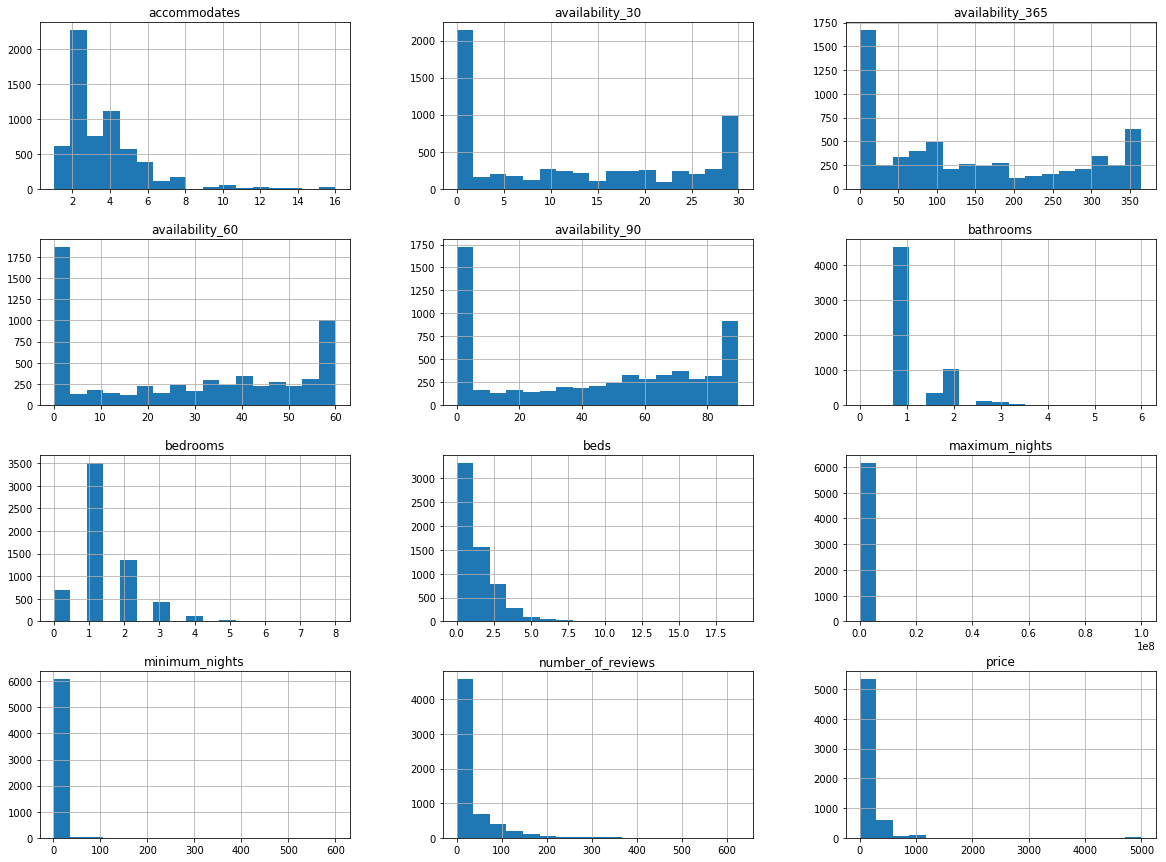

In [27]:
# histogram of numberical features and output label price
df_old.hist(bins=17, figsize=(20, 15))
plt.show()

Distribution for pricing is strongly skewed right. Most listings: 2-4 people, one bed, and one bedrooms.

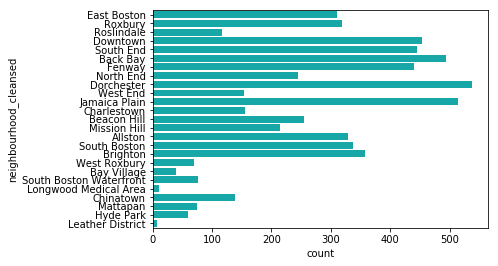

In [28]:
# histogram of 5 categorical features
sns.countplot(y="neighbourhood_cleansed", data=df, color="c")

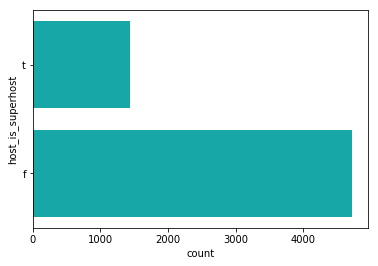

In [29]:
sns.countplot(y="host_is_superhost", data=df, color="c")

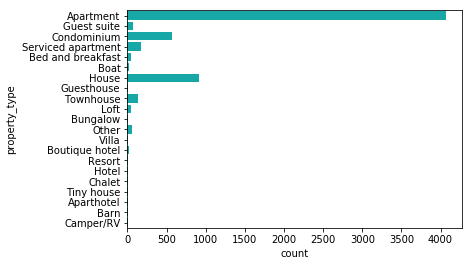

In [30]:
sns.countplot(y="property_type", data=df, color="c")

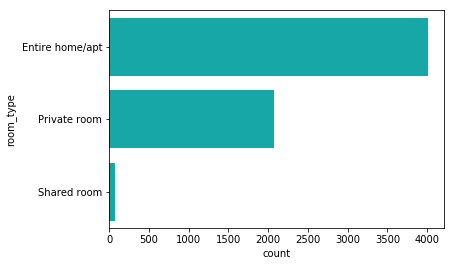

In [31]:
sns.countplot(y="room_type", data=df, color="c")

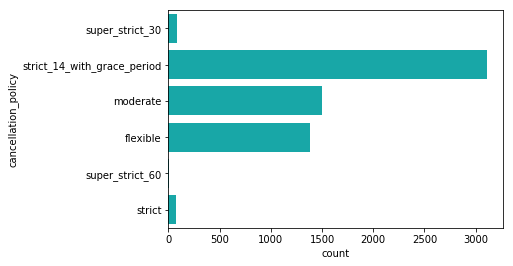

In [32]:
sns.countplot(y="cancellation_policy", data=df, color="c")

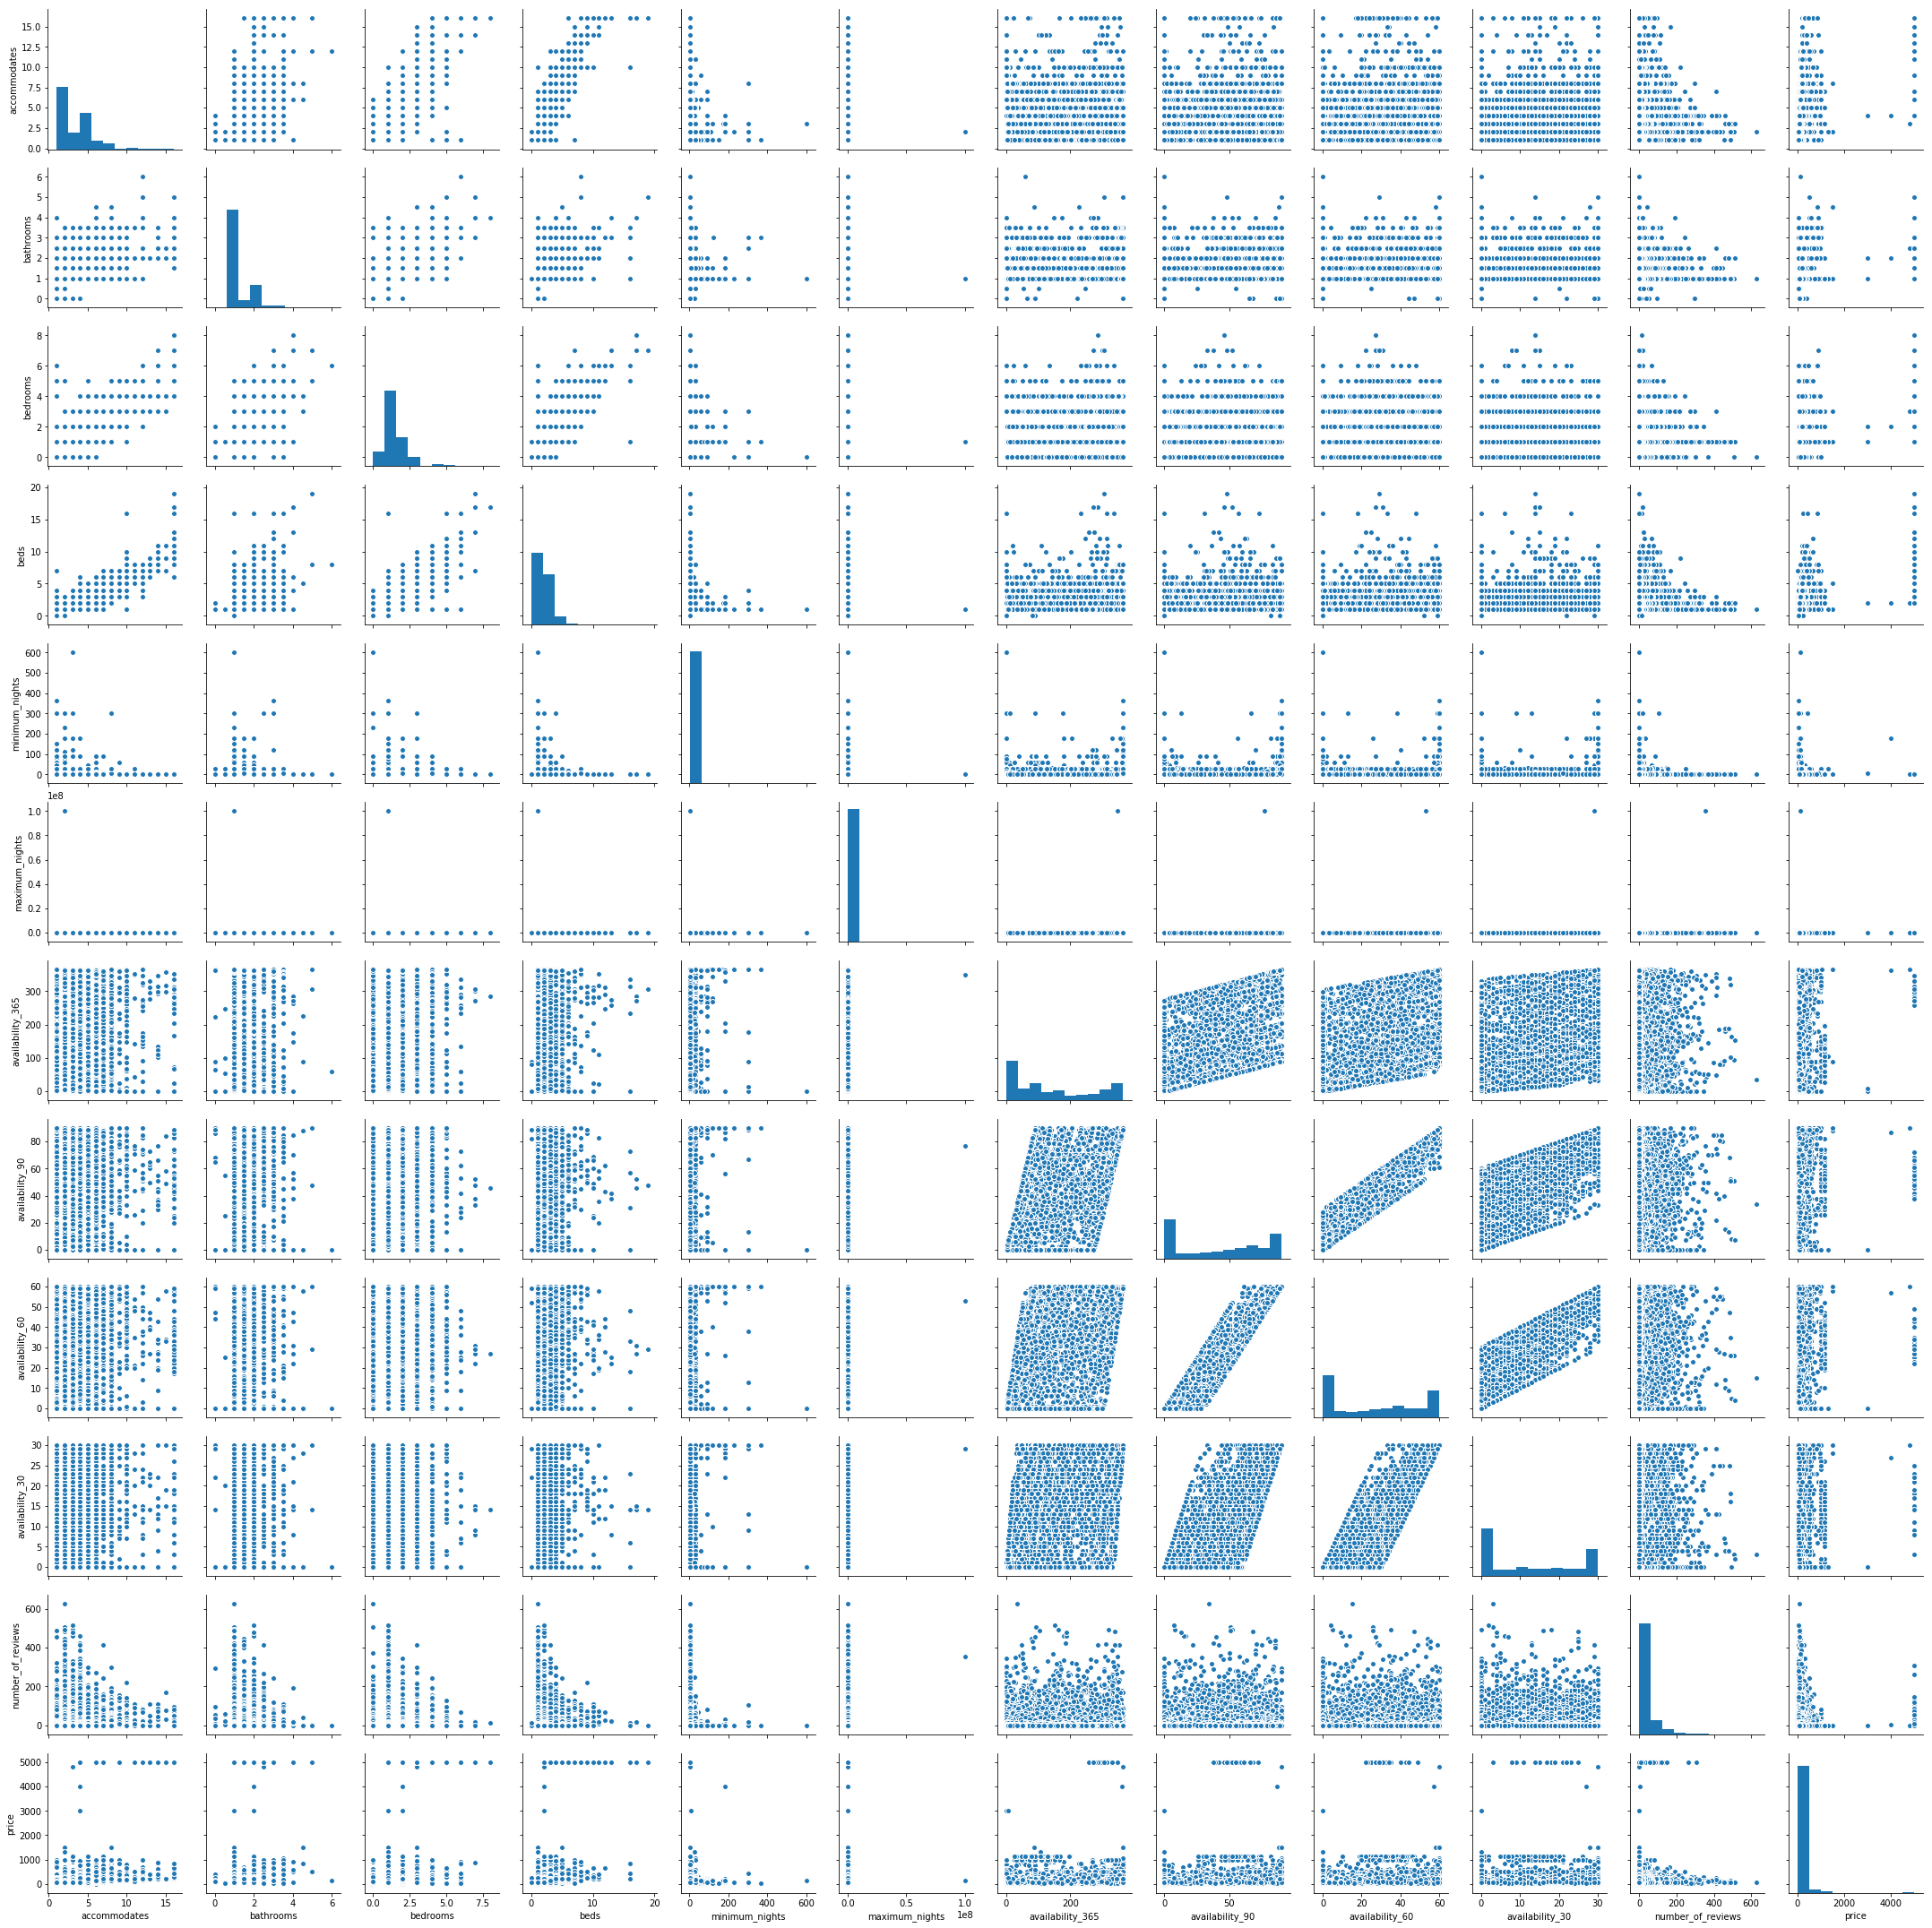

In [33]:
# using seaborn pairplot to Plot pairwise relationships for columns
plt.figure(figsize=(10,10))
sns.pairplot(df_new, vars=cols_num + ['price'])

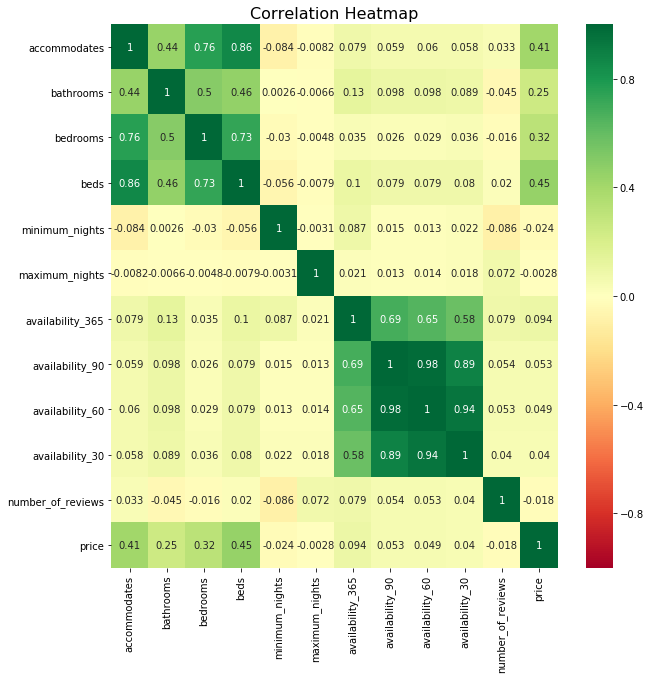

In [34]:
# using searborn heat map to show the correlation heatmap of the columns in the data frame
plt.figure(figsize=(10,10))

corr = df_new[cols_num + ['price']].corr()
corr.index = df_old[cols_num + ['price']].columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()   

Price doesn’t have strong correlations with input features.

# Regression models

1. Seperate dataset into train and test
2. Build regression models:Random Forest, KNN
3. Evaluate model
4. Improve model

In [35]:
# Create X dataframe/array used for machine learning
# X: create from df with all the columns except the output label price
#X=df_new.drop(['price']+ cols_all_cat,axis=1)
#X.head()

X=df_new[['accommodates','bedrooms','bathrooms','number_of_reviews','beds','minimum_nights',
        'maximum_nights', 'availability_30', 'host_is_superhost_t','room_type_Private room','room_type_Shared room']]
X.head()

,accommodates,bedrooms,bathrooms,number_of_reviews,beds,minimum_nights,maximum_nights,availability_30,host_is_superhost_t,room_type_Private room,room_type_Shared room
0,2,1.0,1.0,14,1.0,30,1125,6,1,0,0
1,2,1.0,1.0,80,1.0,3,730,23,1,0,0
2,4,1.0,1.0,85,2.0,3,730,0,1,0,0
3,2,1.0,1.0,75,1.0,3,60,17,1,1,0
4,2,1.0,1.0,22,1.0,30,365,0,0,0,0


In [36]:
# Create y dataframe/array used for machine learning
# y: create from output label price
y=df_new['price']
y.head()

0    125.0
1    145.0
2    169.0
3     65.0
4     99.0
Name: price, dtype: float64

In [37]:
# Create Training and Testing data: X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
# print out the shape of X_train, y_train, 
# make sure the number of rows shall be the same for both dataframes
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# print out the shape of X_test, X_test, 
# make sure the number of rows shall be the same for both dataframes
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (4616, 11)
y_train shape: (4616,)
X_test shape: (1539, 11)
y_test shape: (1539,)


### Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestRegressor
#RandomForestRegressor?

In [40]:
# Build a Random Forrest model using default setting, train the model, predict outcome 
# and evaluate model by calculating the mean accuracy. 
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

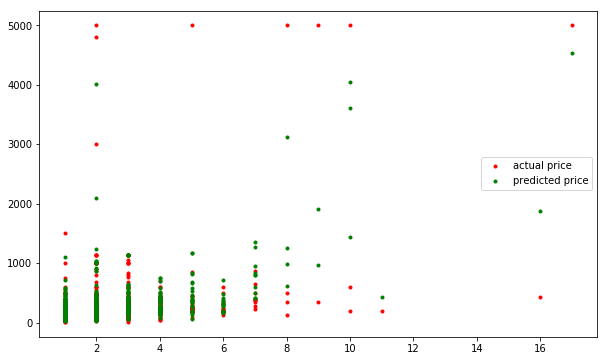

In [41]:
plt.figure(figsize=(10,6))
plt.plot(X_test['beds'], y_test, 'r.')
plt.plot(X_test['beds'], y_pred, 'g.')
plt.legend(['actual price', 'predicted price'])

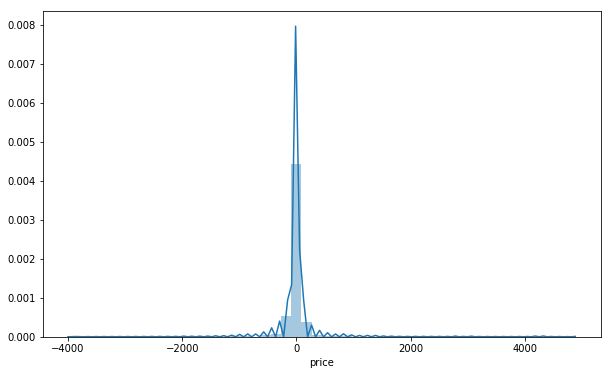

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred)
#sns.distplot(y.ravel() - model.predict(X))

In [43]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

97594.20886824653


beds                      0.240221
number_of_reviews         0.224741
accommodates              0.178674
availability_30           0.103686
minimum_nights            0.080181
maximum_nights            0.073427
bathrooms                 0.027080
bedrooms                  0.025147
host_is_superhost_t       0.023828
room_type_Private room    0.022003
room_type_Shared room     0.001012
dtype: float64


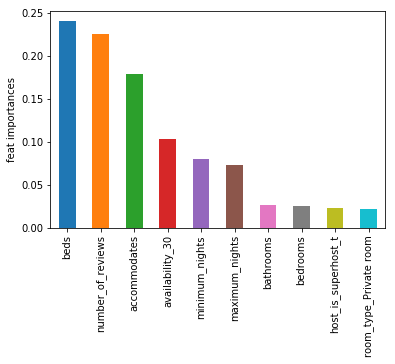

In [44]:
# Caculate the feature importance of the RF model, plot a bar chat of feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns[:]).sort_values(ascending=False)
feat_importances.nlargest(10).plot(kind='bar')
plt.ylabel('feat importances')
print(feat_importances)

In [45]:
RF = RandomForestRegressor(n_estimators=200, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test) 

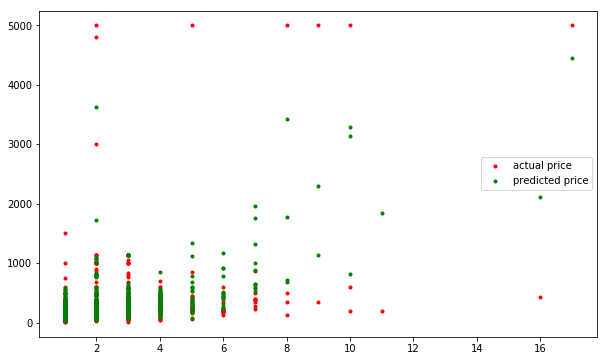

In [46]:
plt.figure(figsize=(10,6))
plt.plot(X_test['beds'], y_test, 'r.')
plt.plot(X_test['beds'], y_pred, 'g.')
plt.legend(['actual price', 'predicted price'])

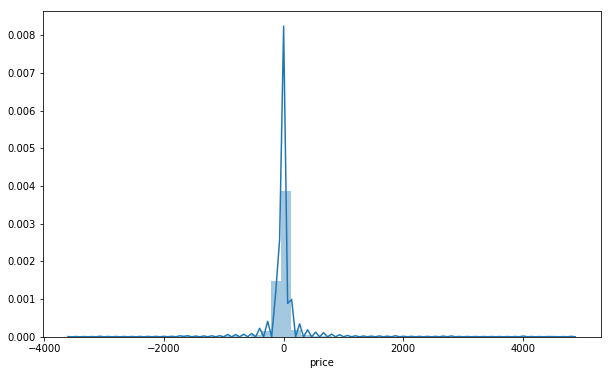

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred)

In [48]:
print(mean_squared_error(y_test, y_pred))

95219.01635875108


The smaller the means squared error, the closer the predict values and the actual value. The MSE is very high here might due to the highly skewed right distribution of the output label price.

##### Errors, model complexity, overfitting

In [49]:
iters = list(range(2,101,2))
errors = []
for i in iters:
    model = RandomForestRegressor(n_estimators=i,random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    errors.append(mean_squared_error(y_test, y_pred))

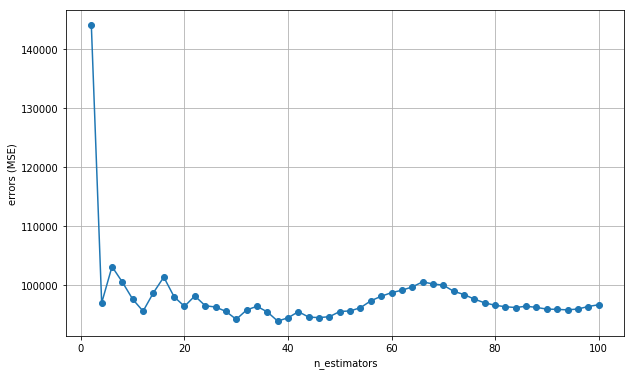

In [50]:
plt.figure(figsize=(10,6))
plt.plot(iters, errors, 'o-')
plt.xlabel('n_estimators')
plt.ylabel('errors (MSE)')
plt.grid()

### KNN model

In [51]:
# set train data and test data
dc_listings = df
features = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']
dc_listings = dc_listings[features]
our_acc_value = 3
dc_listings['distance'] = np.abs(dc_listings.accommodates - our_acc_value)
c_listings = dc_listings.sample(frac=1,random_state=0)
dc_listings = dc_listings.sort_values('distance')

C:\Users\minyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
train_df = dc_listings.copy().iloc[:2800]
test_df = dc_listings.copy().iloc[2800:]

In [53]:
# predict price based on single feature accommodates
def predict_price(new_listing_value,feature_column):
    temp_df = train_df
    temp_df['distance'] = np.abs(dc_listings[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return(predicted_price)
test_df['predicted_price'] = test_df.accommodates.apply(predict_price,feature_column='accommodates')

In [54]:
# get the rmse 
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
rmse = mse ** (1/2)
rmse

489.511913362075

In [55]:
# use the same method to try other features
for feature in ['accommodates','bedrooms','bathrooms','number_of_reviews']:
    test_df['predicted_price'] = test_df[feature].apply(predict_price,feature_column=feature)
    test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse ** (1/2)
    print("RMSE for the {} column: {}".format(feature,rmse))

RMSE for the accommodates column: 489.511913362075
RMSE for the bedrooms column: 479.4552567622547
RMSE for the bathrooms column: 477.8582371080178
RMSE for the number_of_reviews column: 485.58395090555564


The score for bathrooms is the lowest.

#### More features:

In [56]:
# Next, we need to normalized the data in order to reduce the error of rmse
from sklearn.preprocessing import StandardScaler
features = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']

dc_listings = pd.read_csv('listings.csv')

dc_listings = dc_listings[features]

dc_listings['price'] = dc_listings.price.str.replace("\$|,",'').astype(float)

dc_listings = dc_listings.dropna()

dc_listings[features] = StandardScaler().fit_transform(dc_listings[features])

normalized_listings = dc_listings

print(dc_listings.shape)

normalized_listings.head()

(6142, 8)


,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.647868,-0.379028,-0.524915,-0.623772,-0.217782,1.384268,-0.012494,-0.324064
1,-0.647868,-0.379028,-0.524915,-0.623772,-0.164558,-0.129782,-0.012803,0.842031
2,0.270905,-0.379028,-0.524915,0.113708,-0.100689,-0.129782,-0.012803,0.930372
3,-0.647868,-0.379028,-0.524915,-0.623772,-0.377455,-0.129782,-0.013328,0.753691
4,-0.647868,-0.379028,-0.524915,-0.623772,-0.286974,1.384268,-0.013089,-0.182719


In [57]:
# get train and test dataset
norm_train_df = normalized_listings.copy().iloc[0:2800]
norm_test_df = normalized_listings.copy().iloc[2800:]

In [58]:
# build model
from sklearn.neighbors import KNeighborsRegressor
cols = ['accommodates','bedrooms']
knn = KNeighborsRegressor()
knn.fit(norm_train_df[cols], norm_train_df['price'])
two_features_predictions = knn.predict(norm_test_df[cols])
from sklearn.metrics import mean_squared_error
two_features_mse = mean_squared_error(norm_test_df['price'], two_features_predictions)
two_features_rmse = two_features_mse ** (1/2)
print(two_features_rmse)

0.8794679981666864


##### improve the model by changing the n_neighbors

In [59]:
knn = KNeighborsRegressor(n_neighbors=10)
cols = ['accommodates','bedrooms','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews']
knn.fit(norm_train_df[cols], norm_train_df['price'])
four_features_predictions = knn.predict(norm_test_df[cols])
four_features_mse = mean_squared_error(norm_test_df['price'], four_features_predictions)
four_features_rmse = four_features_mse ** (1/2)
four_features_rmse

0.8334842883510091

In [60]:
knn = KNeighborsRegressor(50)

cols = ['accommodates','bedrooms','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews']

knn.fit(norm_train_df[cols], norm_train_df['price'])
four_features_predictions = knn.predict(norm_test_df[cols])
four_features_mse = mean_squared_error(norm_test_df['price'], four_features_predictions)
four_features_rmse = four_features_mse ** (1/2)
four_features_rmse

0.8799083944193007

In [61]:
knn = KNeighborsRegressor(90)

cols = ['accommodates','bedrooms','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews']

knn.fit(norm_train_df[cols], norm_train_df['price'])
four_features_predictions = knn.predict(norm_test_df[cols])
four_features_mse = mean_squared_error(norm_test_df['price'], four_features_predictions)
four_features_rmse = four_features_mse ** (1/2)
four_features_rmse

0.8926914007689829

In [62]:
knn = KNeighborsRegressor(120)

cols = ['accommodates','bedrooms','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews']

knn.fit(norm_train_df[cols], norm_train_df['price'])
four_features_predictions = knn.predict(norm_test_df[cols])
four_features_mse = mean_squared_error(norm_test_df['price'], four_features_predictions)
four_features_rmse = four_features_mse ** (1/2)
four_features_rmse

0.8966003983670188

Finally, we take N = 10, 50, 90, 120 to see which parameter works best. When N = 10, RMSE value is the smallest and the effect is the best.

# Conclusion

In our project, we try to use regression models to predict Boston Airbnb price. We first get the original datasets and create new dataset using selected features. Then, we clean the data: output label, numerical features, categorical features. After that, we visualize the data. Draw histogram for each variable, pairwise relationships for columns, correlation heatmap of the columns. During the visulization, we found some patterns of the variables. At the end, we build regression models, evaluate the model, and try to improve the models. The KNN model with N=10 looks the best in our models. 

From feature importance, we learned that four features are relatively important: number_of_reviews, beds, accommodates, availability_30. That means, hosts could try to improve their number of reviews so that they might have a chance to price higher.